In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys
import shutil

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [2]:
model = IHANKModelClass()
save_figs = True
shock = calculations.difine_shocks(model, scale=0.5, rho = 0.8)[0]

In [3]:
model_baseline = model.copy(name='Baseline')
model_baseline.par.mon_policy = 'taylor_ppi'
# model_baseline.par.gamma = model_baseline.par.epsilon
# model_baseline.par.float = False
# model_baseline.par.eta_s = 0.5
# model_baseline.par.etaF = 0.5
# model_baseline.par.mon_policy = 'taylor'

model_baseline.find_ss()
model_baseline.compute_jacs(do_print=False)
model_baseline.find_transition_path(shocks=shock, do_end_check=False)

In [8]:
model_rws8 = model.copy(name='RWS = 8')
model_rws8.par.real_wage_motive = 10.0
model_rws8.par.mon_policy = 'taylor_ppi'
# model_rws8.par.gamma = model_rws8.par.epsilon
# model_rws8.par.float = False
# model_rws8.par.eta_s = 0.5
# model_rws8.par.etaF = 0.5
# model_rws8.par.mon_policy = 'taylor'

model_rws8.find_ss()
model_rws8.compute_jacs(do_print=False)
model_rws8.find_transition_path(shocks=shock, do_end_check=False)

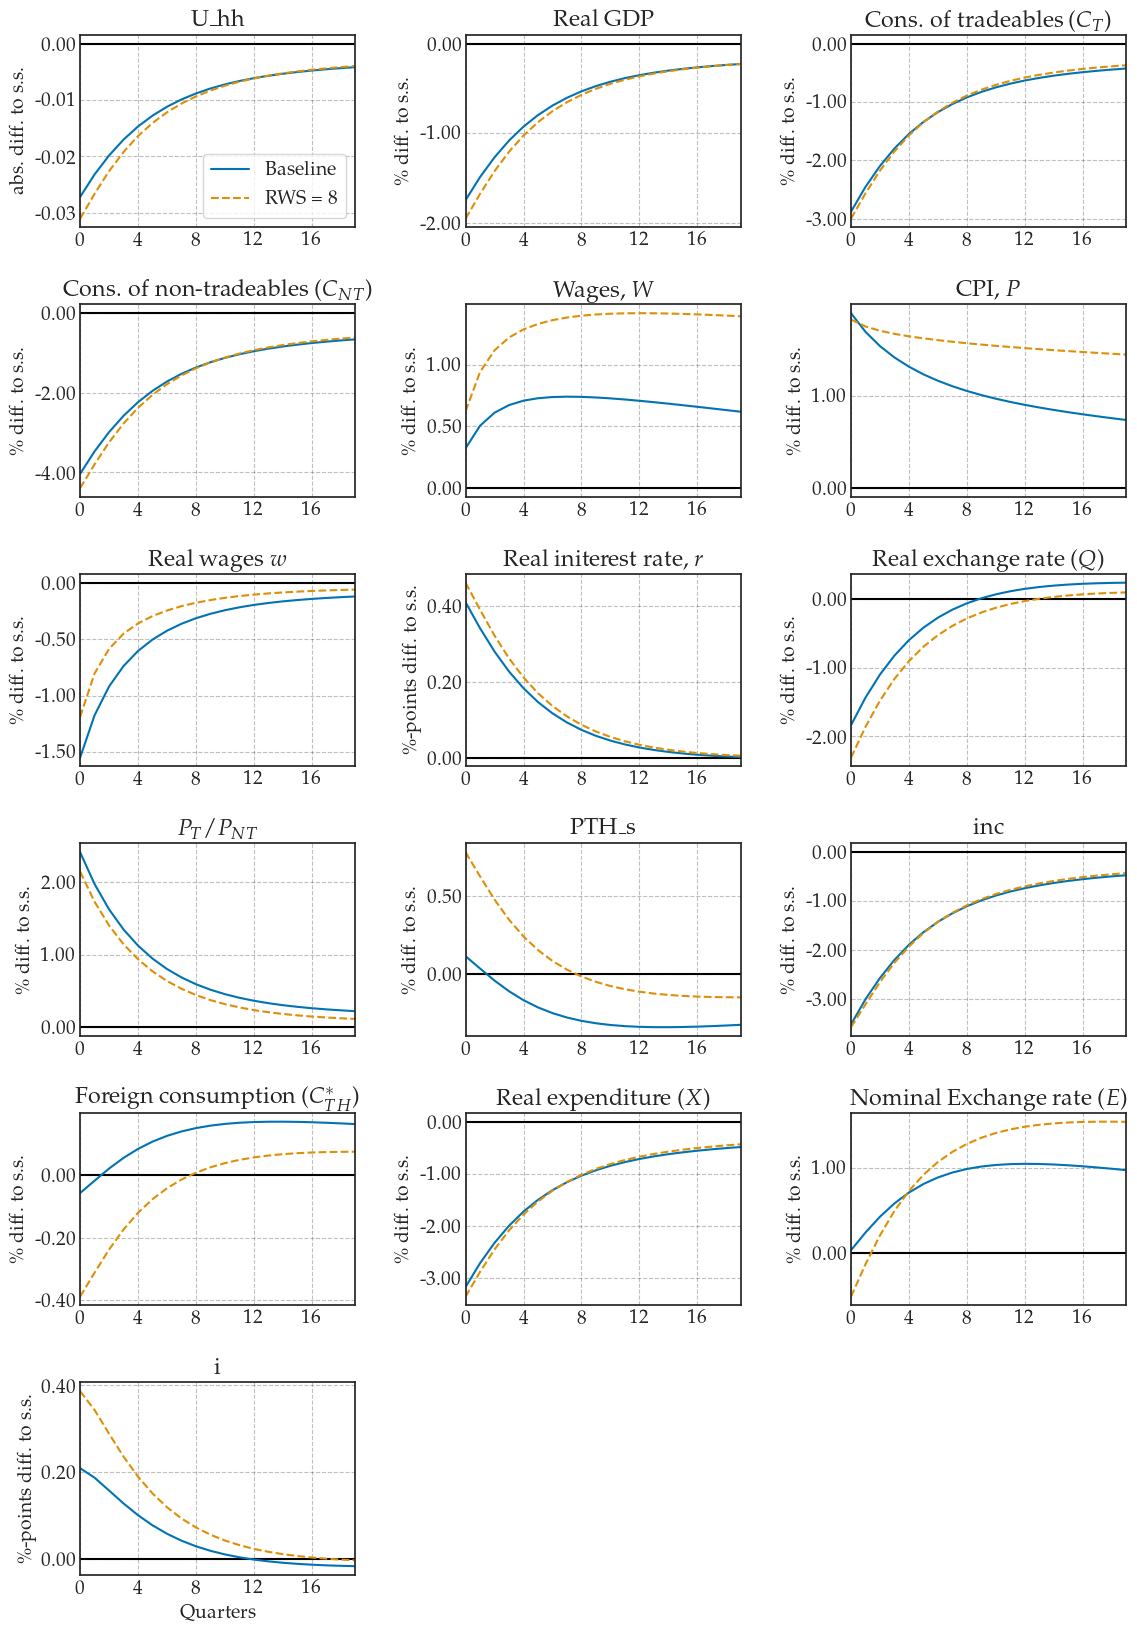

In [9]:
fig = figs.show_IRFs([model_baseline,model_rws8], paths)

In [ ]:
model_tight = model_baseline.copy(name='Tight')
model_tight.par.phi = 3.0
# model_tight.par.gamma = model_tight.par.epsilon
# model_tight.par.float = False
# model_baseline.par.eta_s = 2.0
# model_baseline.par.etaF = 2.0
model_tight.find_ss()
model_tight.compute_jacs(do_print=False)
model_tight.find_transition_path(shocks=shock, do_end_check=False)

In [4]:
model_homo = model_baseline.copy(name='homo')
model_homo.par.epsilon = 0.0
model_homo.par.gamma = 0.18
# model_homo.par.phi = 1.2
# model_homo.par.gamma = model_homo.par.epsilon
# model_homo.par.float = False
model_homo.par.mon_policy = 'taylor_ppi'
model_homo.find_ss()
model_homo.compute_jacs(do_print=False)
model_homo.find_transition_path(shocks=shock, do_end_check=False)

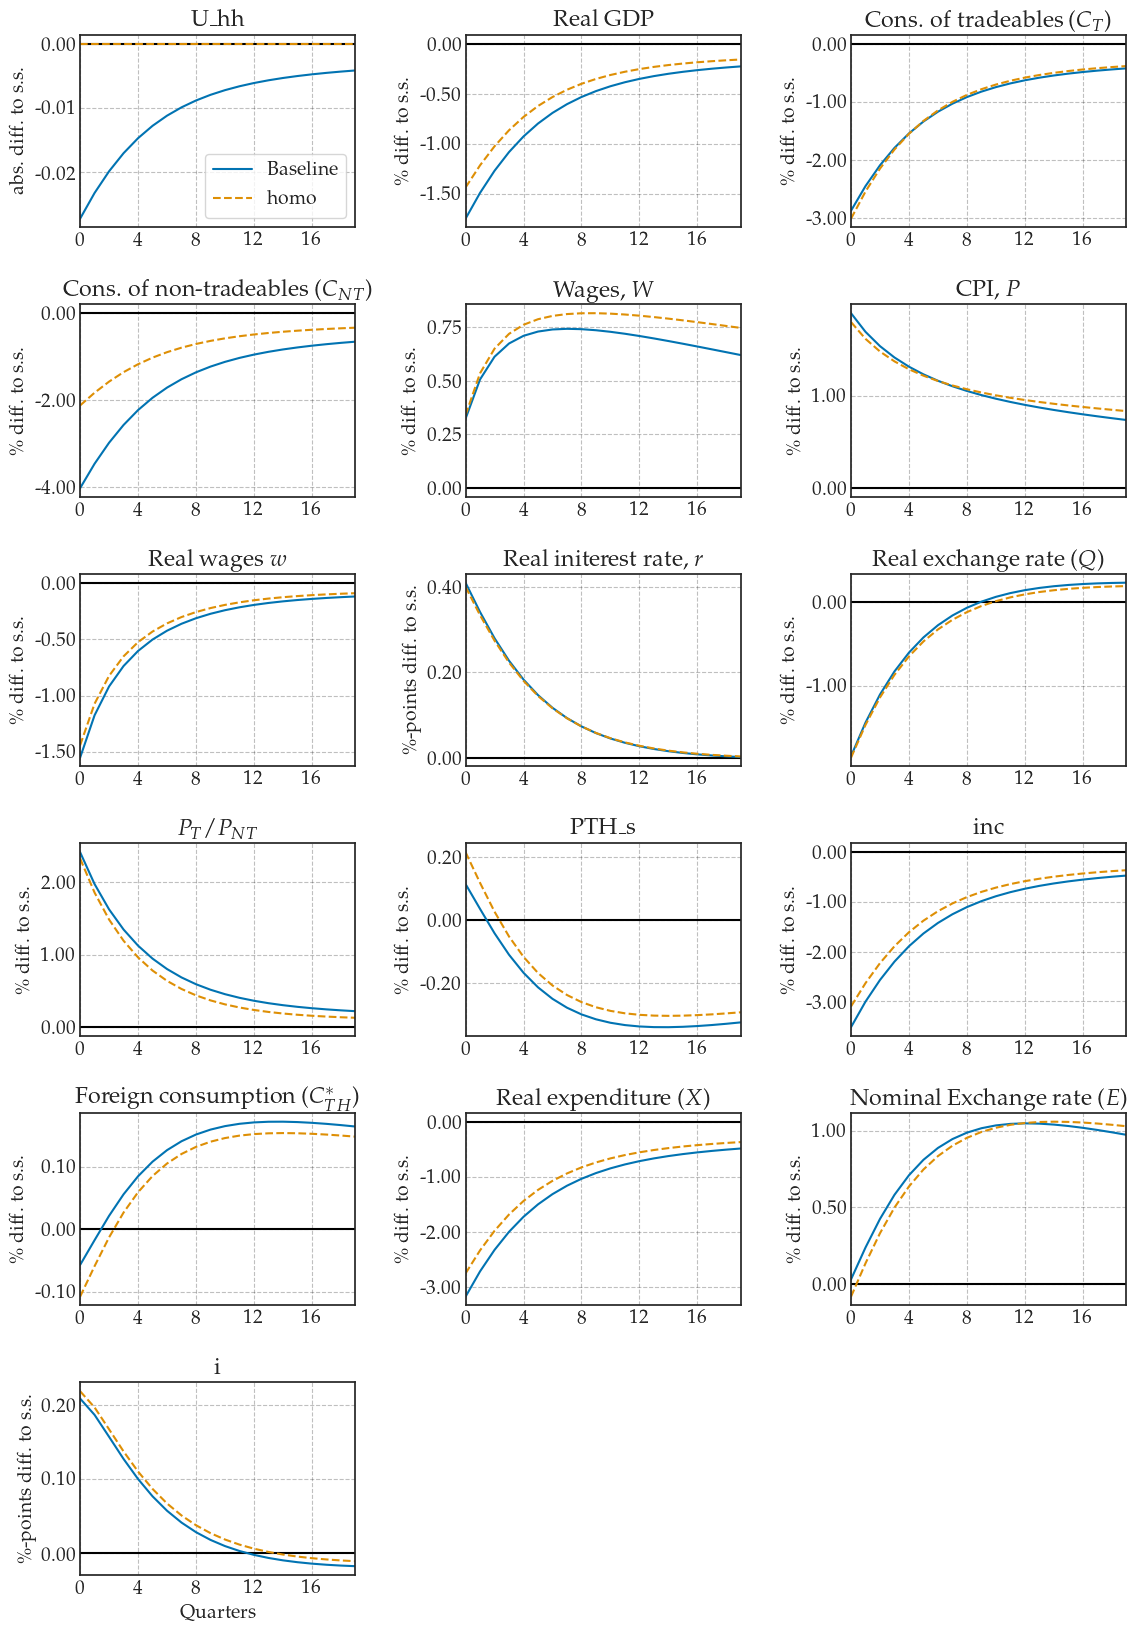

In [5]:
paths = ['U_hh', 'YH', 'CT_hh', 'CNT_hh', 'W', 'P', 'w', 'r_real', 'Q', 'p', 'PTH_s', 'inc', 'CTH_s', 'X', 'E', 'i']
fig = figs.show_IRFs([model_baseline,model_homo], paths)

In [ ]:
fig = figs.show_IRFs([model_baseline,model_lose])

In [ ]:
paths = ['YH', 'CT_hh', 'CNT_hh', 'W', 'P', 'w', 'r_real', 'Q', 'p', 'PTH_s', 'inc', 'CTH_s', 'X', 'E']
fig = figs.show_IRFs([model_lose, model_baseline, model_tight], paths)

In [ ]:
paths = ['YH', 'CT_hh', 'CNT_hh', 'W', 'P', 'w', 'r_real', 'Q', 'p', 'PTH_s', 'inc', 'CTH_s', 'X', 'E']
fig = figs.show_IRFs([model_lose, model_baseline, model_tight], paths)

In [12]:
model_fixed = model.copy(name='Fixed exchange rate')
# model_fixed.par.gamma = model_fixed.par.epsilon
model_fixed.par.float = False
model_fixed.find_ss()
model_fixed.compute_jacs(do_print=False)
model_fixed.find_transition_path(shocks=shock, do_end_check=False)

In [6]:
model_fixed.name = 'Fixed'
model_baseline.name = 'Float'

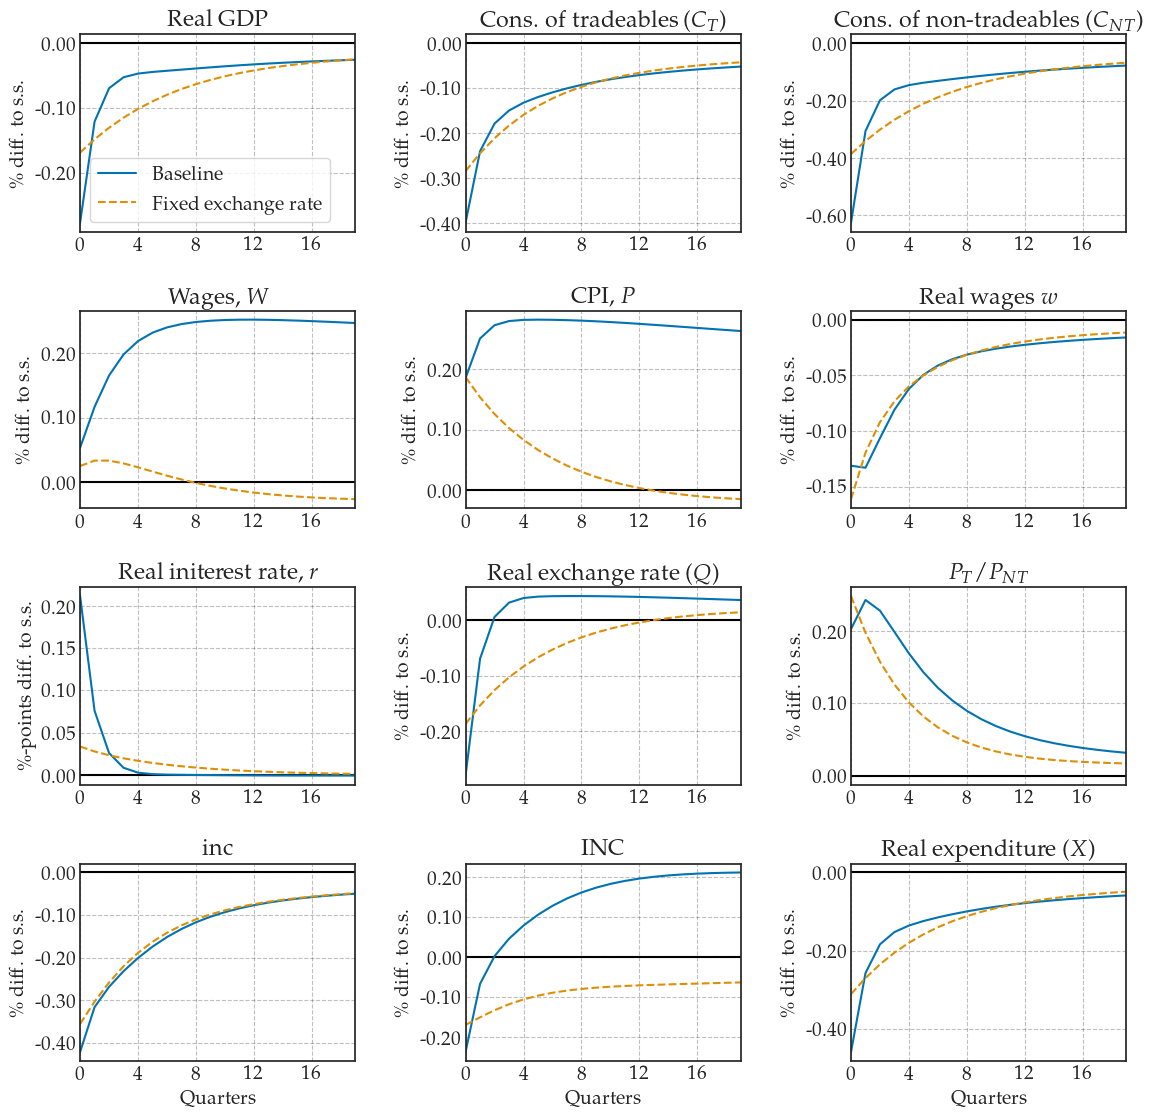

In [14]:
fig = figs.show_IRFs([model_baseline, model_fixed])

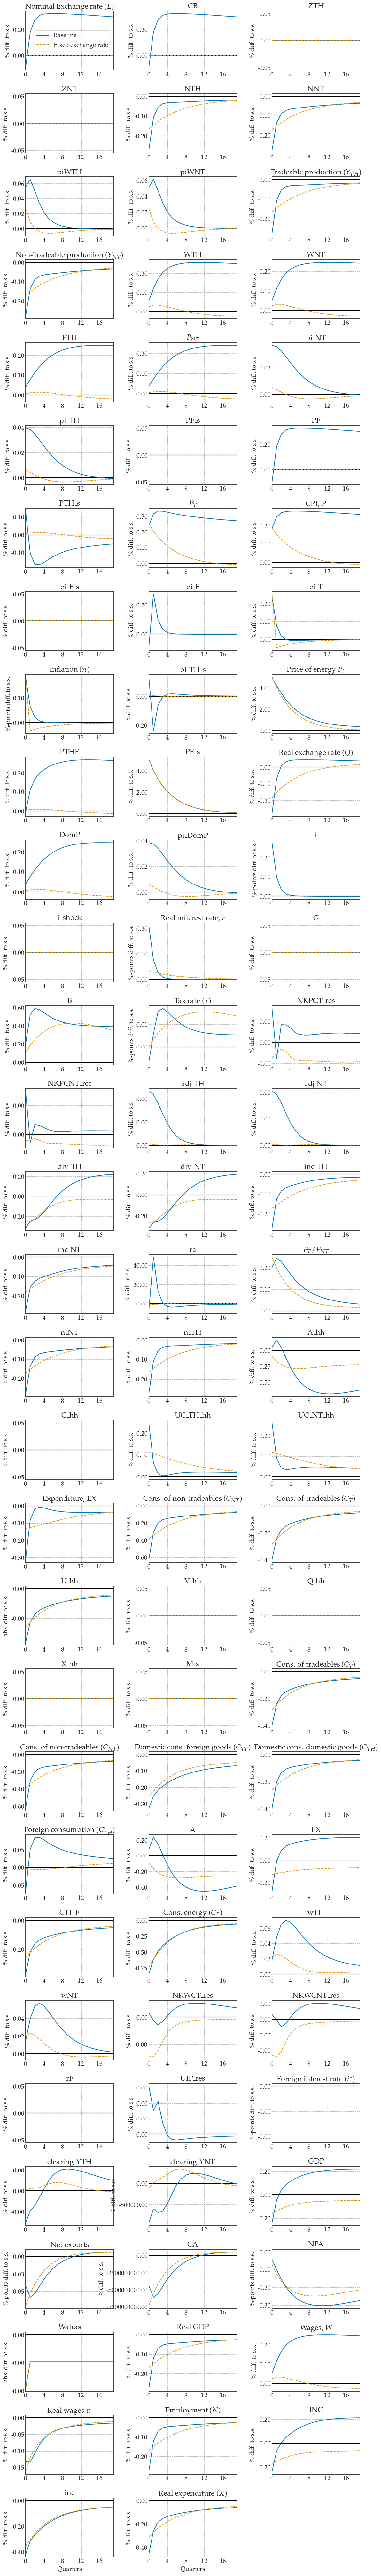

In [13]:
fig = figs.show_IRFs([model_baseline, model_fixed], model.varlist)

In [ ]:
model_homothetic = model.copy(name='Homothetic Preferences')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
# # # model_homothetic.par.gamma = 0.055
# model_homothetic.find_ss()
# model_homothetic.compute_jacs()
# model_homothetic.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
models = [model_baseline, model_homothetic]

In [ ]:
fig = figs.show_IRFs(models)

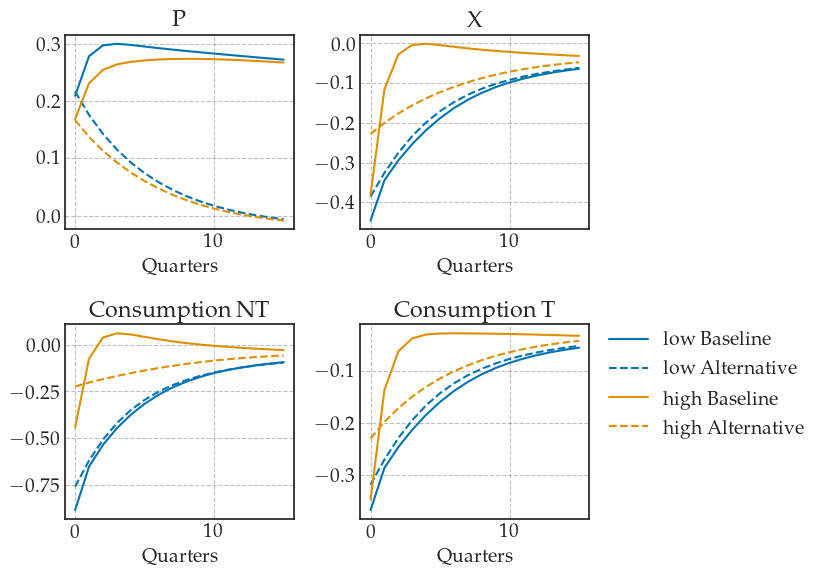

In [7]:
fig = figs.IRF_cohort(model_baseline, shock, model_fixed)

In [ ]:
model_homothetic.name = 'Homothetic'
paths_ = ['PTH', 'PTH_s', 'E',  'CTH_s', 'Q', 'r_real', 'P', 'i']
fig = figs.show_IRFs(models, paths_)

In [ ]:
# High energy 
model_EHigh = IHANKModelClass(name = 'High Energy')
model_EHigh.par.alphaE = model_baseline.par.alphaE *2
model_EHigh.find_ss()
model_EHigh.compute_jacs()
model_EHigh.find_transition_path(shock, do_end_check=False)

In [ ]:
# High energy 
model_ELow = IHANKModelClass(name = 'Low Energy')
model_ELow.par.alphaE = model_baseline.par.alphaE /2
model_ELow.find_ss()
model_ELow.compute_jacs()
model_ELow.find_transition_path(shock, do_end_check=False)

In [ ]:
fig = figs.show_IRFs([model_ELow,model_baseline, model_EHigh] )

In [ ]:

def plot_cor_e(model,ncols = 2, nrows = 1, T_max = 17, type_ = 1):

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # fig.suptitle(f'{model.name},  Individal Price indexes', fontsize=20)

    # period 0

    ax = fig.add_subplot(nrows,ncols,1)    
    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter(  (model.ss.e[type_,inc,:]), model.ss.MPC_e[type_,inc,:], label=f'z = {inc}', s=1)
        
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    ax.set_title('Marginal propensity of Expenditure', fontsize=10) # ****
    ax.set_ylabel(f'MPE', fontsize=12)
    ax.legend()

    # period 7 

    ax = fig.add_subplot(nrows,ncols,2)

    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter( (model.ss.e[type_,inc,:]), model.ss.omegaiT[type_,inc,:], label=f'z = {inc}', s=1)
    #     # For every period
    #     ax.scatter(model.ss.MPC_ct[type_,inc,:], (model.path.p[t,type_,inc,:]-1)*100, label=f'z = {inc}', s=1)
    ax.set_title(f'Tradable goods expenditure share', fontsize=10)
    ax.set_ylabel(r'$\omega_{iT}$', fontsize=16) # ****
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    # ax.legend()

    # ax = fig.add_subplot(nrows,ncols,3)
    # # For ever second income
    # for inc in range(0, 7, 2):
    #     # For every period
    #     ax.scatter( (model.ss.e[type_,inc,:]), model.ss.etaiT[type_,inc,:], label=f'z = {inc}', s=1)
    # ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    # ax.set_title('Elicticity of substitution', fontsize=10) # ****
    # ax.set_ylabel(r'$\eta_{iT}$', fontsize=16) # ****

    fig.tight_layout()
    return fig
plot_cor_e(model_baseline)

In [ ]:


def show_IRFs(models, colors):

    ncols = 2
    nrows = 2
    T_max = 17
    linewidth= 1.0

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # Tradable and  non-tradable
    # fig.suptitle(f'{model[0].name}, Consumption Response', fontsize=20)
    
    ax = fig.add_subplot(nrows,ncols,1)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.P-model.ss.P)/model.ss.P)*100,label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('CPI (P)')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,2)    
    for model in models: 
        ax.plot(((model.path.X-model.ss.X)/model.ss.X)*100,label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Real Expenditure')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))
    
    ax = fig.add_subplot(nrows,ncols,3)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.CT-model.ss.CT)/model.ss.CT)*100,label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('Cons. Tradable goods')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,4)    
    for model in models: 
        ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT)*100,label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Cons. Non-tradable services')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))


    fig.tight_layout()

    return fig

colors_reds = sns.color_palette("Reds", n_colors=4)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

models = [model_baseline, model_homothetic]
fig = show_IRFs(models, colors)

In [ ]:
model_baseline.name = 'Baseline'
model_homothetic.name = 'Homothetic'

def show_IRFs(models, colors):

    ncols = 2
    nrows = 2
    T_max = 17
    linewidth= 1.0

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # Tradable and  non-tradable
    # fig.suptitle(f'{model[0].name}, Consumption Response', fontsize=20)
    
    ax = fig.add_subplot(nrows,ncols,1)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.P-model.ss.P)/model.ss.P)*100,label=model.name, linewidth=linewidth)
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    ax.legend()
    ax.set_title('CPI (P)')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,2)    
    for model in models: 
        ax.plot(((model.path.X-model.ss.X)/model.ss.X)*100,label='$C_E$', linewidth=linewidth)
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Real Expenditure')
    ax.set_xlabel('Quarters')
    ax.set_ylim = [-0.6,0.1]
    ax.set_xticks(np.arange(0,T_max,4))
    
    ax = fig.add_subplot(nrows,ncols,3)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.CT-model.ss.CT)/model.ss.CT)*100,label='$C_T$', linewidth=linewidth)
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('Cons. Tradable goods')
    ax.set_xlabel('Quarters')

    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,4)    
    for model in models: 
        ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT)*100,label=model.name, linewidth=linewidth)
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Cons. Non-tradable services')
    ax.set_xlabel('Quarters')

    ax.set_xticks(np.arange(0,T_max,4))


    fig.tight_layout()

    return fig

colors_reds = sns.color_palette("Reds", n_colors=4)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

models = [model_baseline, model_homothetic]
fig = show_IRFs(models, colors)

In [ ]:


model_baseline.calc_additional()
def plot_cor_e(model,ncols = 2, nrows = 1, T_max = 17, type_ = 1):

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # fig.suptitle(f'{model.name},  Individal Price indexes', fontsize=20)

    # period 0

    ax = fig.add_subplot(nrows,ncols,1)    
    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter(  (model.ss.e[type_,inc,:]), model.ss.MPC_e[type_,inc,:], label=f'z = {inc}', s=0.8, color= 'black')
        
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    ax.set_title('Marginal propensity of Expenditure', fontsize=10) # ****
    ax.set_ylabel(f'MPE', fontsize=12)
    # ax.legend()

    # period 7 

    ax = fig.add_subplot(nrows,ncols,2)

    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.scatter( (model.ss.e[type_,inc,:]), model.ss.omegaiT[type_,inc,:], s=0.8, color= 'black')
    #     # For every period
    #     ax.scatter(model.ss.MPC_ct[type_,inc,:], (model.path.p[t,type_,inc,:]-1)*100, label=f'z = {inc}', s=1)
    ax.set_title(f'Tradable goods expenditure share', fontsize=10)
    ax.set_ylabel(r'$\omega_{iT}$', fontsize=16) # ****
    ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    # ax.legend()

    # ax = fig.add_subplot(nrows,ncols,3)
    # # For ever second income
    # for inc in range(0, 7, 2):
    #     # For every period
    #     ax.scatter( (model.ss.e[type_,inc,:]), model.ss.etaiT[type_,inc,:], label=f'z = {inc}', s=1)
    # ax.set_xlabel(r' Expenditure ($e_i$)', fontsize=10) # ****
    # ax.set_title('Elicticity of substitution', fontsize=10) # ****
    # ax.set_ylabel(r'$\eta_{iT}$', fontsize=16) # ****

    fig.tight_layout()
    return fig

fig = plot_cor_e(model_baseline)


In [ ]:
figs.plot_cor_e(model_baseline)